In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

from sklearn.preprocessing import LabelEncoder
from numpy import interp

In [5]:
df = pd.read_csv("german_credit_data.csv")

In [6]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
# checking data for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [8]:
#unique values
print(df.nunique())

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


In [9]:
# number of missing values
missing = df.isnull().sum()
print(missing)


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [10]:
# missing values replaced with mode
df["Saving accounts"].fillna(df['Saving accounts'].mode()[0], inplace=True)
df["Checking account"].fillna(df['Checking account'].mode()[0], inplace=True)

In [11]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
#creating new dataset just to be sure
df_credit = df.copy()

In [13]:
# prepering dependend variable to dummy
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [14]:
# change into numeric 0 and 1
for col in ["Risk"]:
    le = LabelEncoder()
    le.fit(df_credit[col])
    df_credit[col] = le.transform(df_credit[col])
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,male,1,own,little,little,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,0


In [15]:
#prepering the explained variable
df_y = df[['Risk']]
df_y.head()
print(df_y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Risk    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [16]:
#drop unnamed
df_credit = df_credit.drop(["Unnamed: 0"], axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [ ]:
# computing WOE and merging categories with similar distribution of good and bad into bins

In [17]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

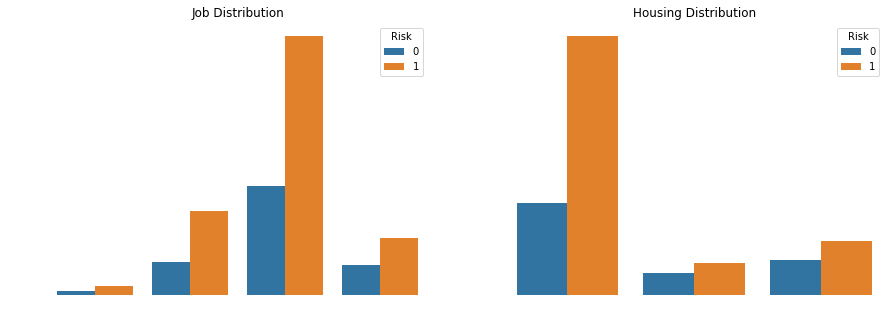

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit,hue="Risk", x="Job", ax=ax[0]).set_title("Job Distribution");
sns.countplot(data=df_credit, x="Housing",hue="Risk", ax=ax[1]).set_title("Housing Distribution");


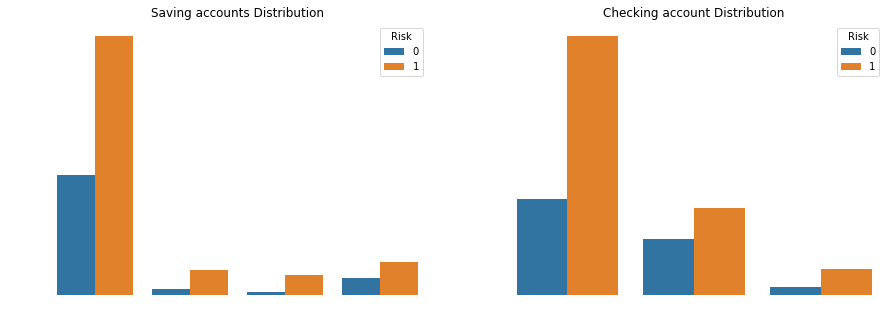

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Saving accounts",hue="Risk", ax=ax[0]).set_title("Saving accounts Distribution");
sns.countplot(data=df_credit, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking account Distribution");

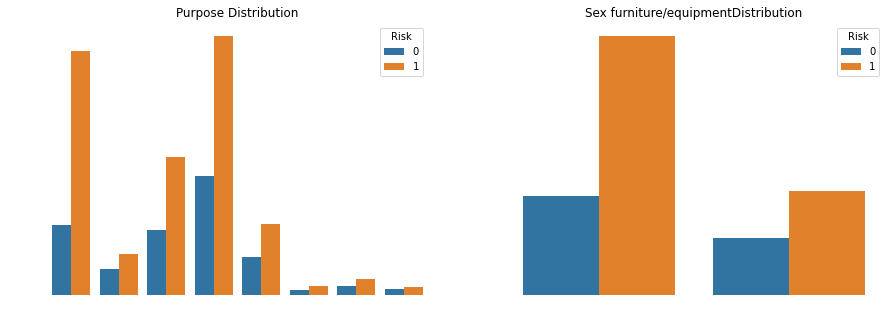

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Purpose",hue="Risk", ax=ax[0]).set_title("Purpose Distribution");
sns.countplot(data=df_credit, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex furniture/equipmentDistribution");

In [21]:
#binning for job
df_credit['Job'] = df_credit['Job'].replace(['0', '1', '2', '3'],['Unskilled', 'Unskilled', 'Skilled', 'Highly Skilled'])

In [22]:
#binning for Saving accounts
df_credit['Saving accounts'] = df_credit['Saving accounts'].replace(['little' ,'moderate', ' quite rich', 'rich'],['little', 'moderate', 'rich', 'rich'])

In [23]:
#binning for purpose
df_credit['Purpose'] = df_credit['Purpose'].replace(['business','car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],['business','car', 'furniture/equipment', 'education', 'furniture/equipment', 'radio/TV', 'others', 'others'])

In [24]:
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               6
Risk                  2
dtype: int64


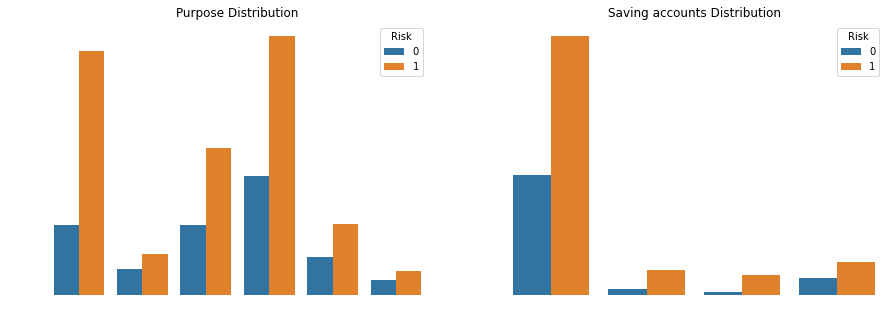

In [25]:
# plots just to check
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Purpose",hue="Risk", ax=ax[0]).set_title("Purpose Distribution");
sns.countplot(data=df_credit, x="Saving accounts", hue="Risk", ax=ax[1]).set_title("Saving accounts Distribution");

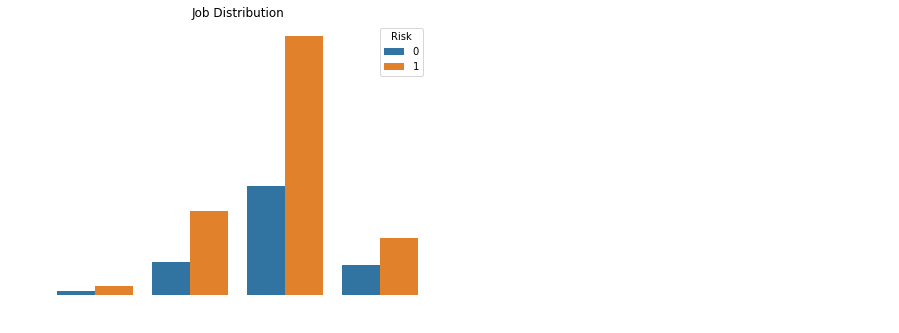

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_credit, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution");

Methods we can use:

Random Forest Classifier <br>
Logistic Regression models<br>
Decision Tree Classifier<br>
K-Nearest Neighbors Classifier<br>
Random Forest Classifier<br>
Gaussian Naive Bayes<br>
SVC<br>

<AxesSubplot:xlabel='Age', ylabel='Count'>

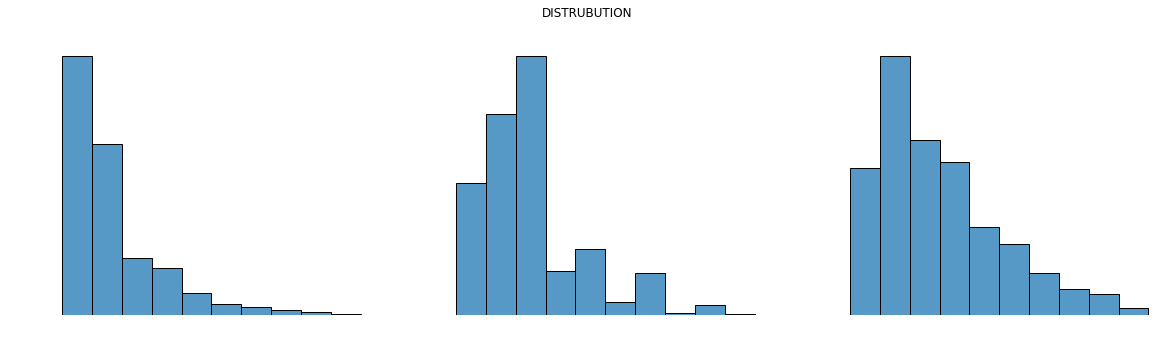

In [30]:
#distribution
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRUBUTION')
sns.histplot(df_credit['Credit amount'], bins=10, ax=ax[0])
sns.histplot(df_credit['Duration'], bins=10, ax=ax[1])
sns.histplot(df_credit['Age'], bins=10, ax=ax[2],)

In [69]:
#standardization by log
#also option to make age categorical
num_df_credit = df_credit[['Age', 'Duration', 'Credit amount']]
from sklearn import preprocessing
num_df = pd.DataFrame(data=preprocessing.StandardScaler().fit_transform(num_df_credit), columns=num_df_credit.columns)
# num_df = np.log(num_df_credit)

<AxesSubplot:xlabel='Age', ylabel='Count'>

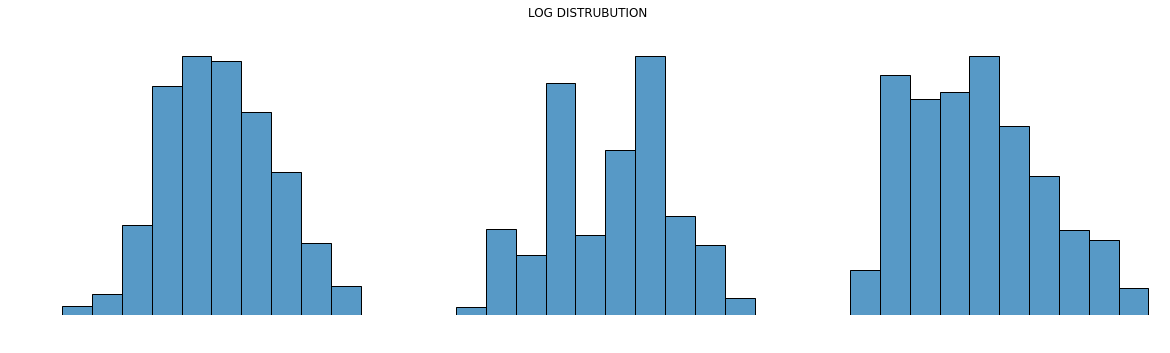

In [71]:
#plots for logs
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('LOG DISTRUBUTION')
sns.histplot(num_df['Credit amount'], bins=10, ax=ax[0])
sns.histplot(num_df['Duration'], bins=10, ax=ax[1])
sns.histplot(num_df['Age'], bins=10, ax=ax[2],)

In [72]:
#TODO Add num_df to df
df_credit['Credit amount'] = num_df['Credit amount']
df_credit['Duration'] = num_df['Duration']
df_credit['Age'] = num_df['Age']

In [73]:
#TODO Create dummy variables
df_credit = pd.get_dummies(df_credit, drop_first=True)
df_credit.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/TV
0,2.271006,2,-0.933901,-1.864869,1,1,1,0,0,0,0,0,0,0,0,0,0,1
1,-1.446152,2,1.163046,1.708369,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1.226696,1,-0.181559,-0.673790,1,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0.942455,2,1.525148,1.478913,1,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1.488620,2,0.904743,0.517289,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:

#Creating the X and y variables
X = df_credit.drop('Risk', axis=1)
y = df_credit['Risk']

In [75]:
# importing for splitting Test and train
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV  
from sklearn.tree import DecisionTreeRegressor


In [76]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:

X.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/TV
0,2.271006,2,-0.933901,-1.864869,1,1,0,0,0,0,0,0,0,0,0,0,1
1,-1.446152,2,1.163046,1.708369,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1.226696,1,-0.181559,-0.673790,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0.942455,2,1.525148,1.478913,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1.488620,2,0.904743,0.517289,1,0,0,0,0,0,0,0,1,0,0,0,0


In [78]:
#check of the split
print('xtrain shape: ', X_train.shape)
print('xtest shape: ', X_test.shape)
print('ytrain shape: ', y_train.shape)
print('ytest shape: ', y_test.shape)

xtrain shape:  (750, 17)
xtest shape:  (250, 17)
ytrain shape:  (750,)
ytest shape:  (250,)


In [79]:
#we are going to use this to evalueta the model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score 

In [80]:
#now we need to select the methods , first step is importing the algorythms , then comparing, then choosing the best one
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold

In [43]:
seed = 42

In [85]:
# running the models
models = []
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [83]:
cv = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results = cross_val_score(LogisticRegression(), X_train, y_train, cv=cv, scoring='recall')
print(f'mean: {cv_results.mean()}')
print(f'std: {cv_results.std()}')

mean: 0.9377566235991626
std: 0.03889006733177907


LGR: 0.934502 (0.042931)
LDA: 0.923309 (0.040912)
KNN: 0.856873 (0.046550)
CART: 0.721759 (0.036378)
NB: 0.698481 (0.065903)
RF: 0.872076 (0.030144)
SVM: 1.000000 (0.000000)


<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

<Figure size 792x432 with 0 Axes>

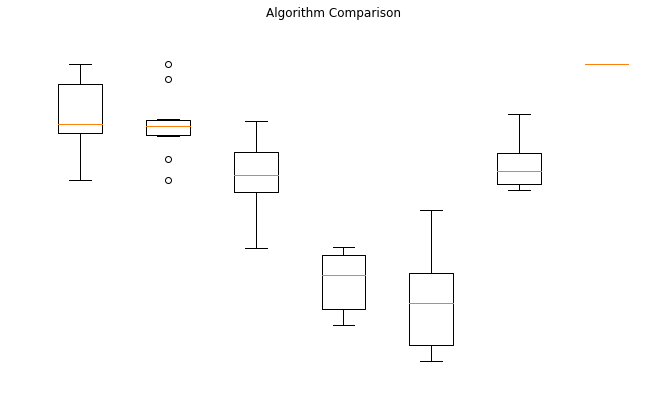

In [86]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        cv = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()